# Exercise 1

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
file_path = 'car_sales_data.csv'
df = pd.read_csv(file_path)

In [4]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Price' from the list as it's our target variable
numerical_columns.remove('Price')

# Initialize variables to store model performances
best_predictor = None
best_rmse = float('inf')

In [4]:
print(numerical_columns)

['Engine size', 'Year of manufacture', 'Mileage']


# Part A

In [5]:
def train_and_evaluate_model(feature):
    global best_predictor, best_rmse
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[feature].values.reshape(-1, 1), df['Price'], test_size=0.2, random_state=42)
    
    # Standardize numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    linear_predictions = linear_model.predict(X_test_scaled)
    linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
    print("Linear Model Error: ", linear_rmse, "using feature : ", feature);
    
    # Polynomial regression model (degree=2)
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    poly_predictions = poly_model.predict(X_test_poly)
    poly_rmse = mean_squared_error(y_test, poly_predictions, squared=False)
    print("Polynomial Model Error: ", poly_rmse, "using feature : ", feature);
    
    # Compare models and update best predictor
    if linear_rmse < best_rmse:
        best_predictor = (feature, 'Linear')
        best_rmse = linear_rmse
    
    if poly_rmse < best_rmse:
        best_predictor = (feature, 'Polynomial (Degree 2)')
        best_rmse = poly_rmse


In [6]:
# Train and evaluate models for each numerical feature
for feature in numerical_columns:
    train_and_evaluate_model(feature)

# Display the best predictor and its model type
print(f"The best predictor for car's price is '{best_predictor[0]}' with the best model type: '{best_predictor[1]}'")

Linear Model Error:  15182.198604049128 using feature :  Engine size
Polynomial Model Error:  15176.5004529855 using feature :  Engine size
Linear Model Error:  11518.637069893768 using feature :  Year of manufacture
Polynomial Model Error:  10295.333612950251 using feature :  Year of manufacture
Linear Model Error:  12746.315815659875 using feature :  Mileage
Polynomial Model Error:  11385.091662460154 using feature :  Mileage
The best predictor for car's price is 'Year of manufacture' with the best model type: 'Polynomial (Degree 2)'


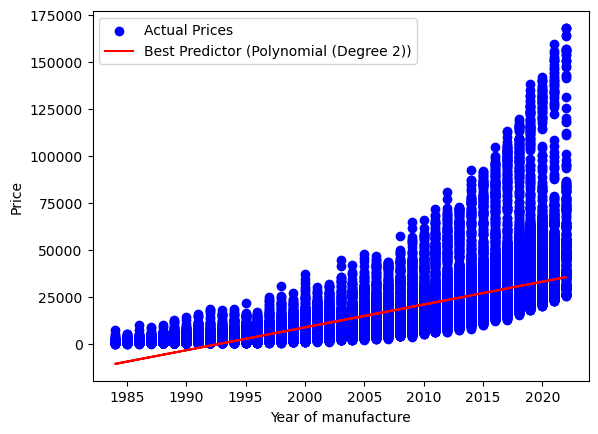

In [7]:
# Plot the best predictor's regression line
X_best_predictor = df[best_predictor[0]].values.reshape(-1, 1)
y_best_predictor = df['Price']
best_predictor_model = LinearRegression()
best_predictor_model.fit(X_best_predictor, y_best_predictor)

plt.scatter(X_best_predictor, y_best_predictor, color='blue', label='Actual Prices')
plt.plot(X_best_predictor, best_predictor_model.predict(X_best_predictor), color='red', label=f'Best Predictor ({best_predictor[1]})')
plt.xlabel(best_predictor[0])
plt.ylabel('Price')
plt.legend()
plt.show()


## Part B

In [8]:
def train_and_evaluate_model_b(features, model_type):
    global best_predictor, best_rmse
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['Price'], test_size=0.2, random_state=42)
    
    # Standardize numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Choose the model type
    if model_type == 'Linear':
        model = LinearRegression()
    elif model_type == 'Polynomial':
        model = LinearRegression()
        X_train_scaled = PolynomialFeatures(degree=2).fit_transform(X_train_scaled)
        X_test_scaled = PolynomialFeatures(degree=2).fit_transform(X_test_scaled)
    else:
        raise ValueError("Invalid model type. Choose 'Linear' or 'Polynomial'.")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    predictions = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print("Polynomial Model Error: ", rmse, "using features : " , features)
    
    # Compare models and update best predictor
    if rmse < best_rmse:
        best_predictor = (features, model_type)
        best_rmse = rmse

In [9]:
for feature in numerical_columns:
    train_and_evaluate_model_b([feature], 'Linear')
    train_and_evaluate_model_b([feature], 'Polynomial')
    
for feature1 in numerical_columns:
    for feature2 in numerical_columns:
        if feature1 != feature2:
            train_and_evaluate_model_b([feature1, feature2], 'Linear')
            train_and_evaluate_model_b([feature1, feature2], 'Polynomial')
            
# Display the best predictor and its model type
print(f"The best predictor for car's price is '{best_predictor[0]}' with the best model type: '{best_predictor[1]}'")

Polynomial Model Error:  15182.198604049128 using features :  ['Engine size']
Polynomial Model Error:  15176.5004529855 using features :  ['Engine size']
Polynomial Model Error:  11518.637069893768 using features :  ['Year of manufacture']
Polynomial Model Error:  10295.333612950251 using features :  ['Year of manufacture']
Polynomial Model Error:  12746.315815659875 using features :  ['Mileage']
Polynomial Model Error:  11385.091662460154 using features :  ['Mileage']
Polynomial Model Error:  9574.29213075259 using features :  ['Engine size', 'Year of manufacture']
Polynomial Model Error:  5811.6382812761985 using features :  ['Engine size', 'Year of manufacture']
Polynomial Model Error:  10999.48370342527 using features :  ['Engine size', 'Mileage']
Polynomial Model Error:  8020.5221735539 using features :  ['Engine size', 'Mileage']
Polynomial Model Error:  9574.29213075259 using features :  ['Year of manufacture', 'Engine size']
Polynomial Model Error:  5811.638281276199 using feat

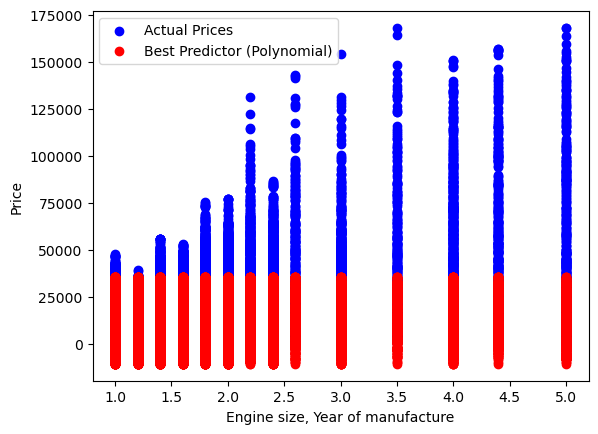

In [10]:
# Plot the best predictor's regression line for visualization
if len(best_predictor[0]) == 1:
    X_best_predictor_plot = df[best_predictor[0]].values.reshape(-1, 1)
else:
    X_best_predictor_plot = df[best_predictor[0]].iloc[:, 0]  # Choose the first column for visualization

y_best_predictor = df['Price']
best_predictor_model = LinearRegression()
best_predictor_model.fit(X_best_predictor, y_best_predictor)

plt.scatter(X_best_predictor_plot, y_best_predictor, color='blue', label='Actual Prices')
plt.plot(X_best_predictor_plot, best_predictor_model.predict(X_best_predictor), 'o', color='red', label=f'Best Predictor ({best_predictor[1]})')
plt.xlabel(', '.join(best_predictor[0]))
plt.ylabel('Price')
plt.legend()
plt.show()

## Part C

In [11]:
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42)

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[('num', 'passthrough')])  # No transformation for numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
# Create preprocessor to apply transformers to respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num',
                                                                   'passthrough')]),
                                                  ['Engine size',
                                                   'Year of manufacture',
                                                   'Mileage']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Manufacturer', 'Model',
                                                   'Fuel type'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [14]:
# Make predictions and evaluate the model
predictions = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Display the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 632.6871791038523


# Part D

In [15]:
# Separate features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [16]:
# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(exclude=['number']).columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessor to apply transformers to respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [18]:
# Apply preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert sparse matrix to dense NumPy array before converting to PyTorch tensor
X_train_tensor = torch.Tensor(X_train_preprocessed.toarray())
y_train_tensor = torch.Tensor(y_train.values.reshape(-1, 1))

X_test_tensor = torch.Tensor(X_test_preprocessed.toarray())
y_test_tensor = torch.Tensor(y_test.values.reshape(-1, 1))

In [19]:
# Define the neural network architecture
class CarPricePredictor(nn.Module):
    def __init__(self, input_size):
        super(CarPricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [20]:
# Instantiate the model
input_size = X_train_preprocessed.shape[1]
model = CarPricePredictor(input_size)

In [21]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
# Convert the tensors to DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [23]:
# Training the model
epochs = 20
print_interval = 10

for epoch in range(epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % print_interval == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [10/20], Loss: 4096697.25
Epoch [20/20], Loss: 183350.171875


In [24]:
# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    ann_rmse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy(), squared=False)
print("ANN Model Error (RMSE):", ann_rmse)

ANN Model Error (RMSE): 596.9999


## Part E

## Part F

In [5]:
# Separate numerical variables (adjust based on your dataset)
numerical_columns = df.select_dtypes(include=['number']).columns
X = df[numerical_columns]

In [6]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Try different combinations of numerical variables
numerical_combinations = [
    ['Year of manufacture', 'Mileage'],
    ['Engine size', 'Mileage'],
    ['Engine size', 'Year of manufacture']
]

In [28]:
# Evaluate clustering for each combination and different values of k
for features in numerical_combinations:
    for k in range(2, 10):  # Adjust the range of k based on your dataset
        # Apply k-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
        clusters = kmeans.fit_predict(X_scaled)

        # Evaluate clustering performance
        silhouette = silhouette_score(X_scaled, clusters)
        davies_bouldin = davies_bouldin_score(X_scaled, clusters)

        print(f'Features: {features}, k: {k}, Silhouette Score: {silhouette}, Davies-Bouldin Index: {davies_bouldin}')

Features: ['Year of manufacture', 'Mileage'], k: 2, Silhouette Score: 0.39735675661460274, Davies-Bouldin Index: 0.9841527072766522
Features: ['Year of manufacture', 'Mileage'], k: 3, Silhouette Score: 0.4093777993502264, Davies-Bouldin Index: 0.957912509564022
Features: ['Year of manufacture', 'Mileage'], k: 4, Silhouette Score: 0.328995478659553, Davies-Bouldin Index: 0.9876761833564394
Features: ['Year of manufacture', 'Mileage'], k: 5, Silhouette Score: 0.343744398210847, Davies-Bouldin Index: 0.8953580078939852
Features: ['Year of manufacture', 'Mileage'], k: 6, Silhouette Score: 0.29801437627490474, Davies-Bouldin Index: 0.9524050784773186
Features: ['Year of manufacture', 'Mileage'], k: 7, Silhouette Score: 0.27303272152241786, Davies-Bouldin Index: 1.0097146049595984
Features: ['Year of manufacture', 'Mileage'], k: 8, Silhouette Score: 0.2800694520350489, Davies-Bouldin Index: 1.0132378712529535
Features: ['Year of manufacture', 'Mileage'], k: 9, Silhouette Score: 0.28069235267

## Part G

In [9]:
# Evaluate DBSCAN Clustering
for features in numerical_combinations:
    epsilons = [0.5, 1.0]  # Adjust the range of epsilon based on your dataset
    for epsilon in epsilons:
        dbscan = DBSCAN(eps=epsilon)
        clusters_dbscan = dbscan.fit_predict(X_scaled)

        # Exclude noise points (-1) from silhouette calculation
        if len(set(clusters_dbscan)) > 1:  
            silhouette_dbscan = silhouette_score(X_scaled, clusters_dbscan)
        else:
            silhouette_dbscan = -1  # Set to -1 if there's only one cluster (noise)

        davies_bouldin_dbscan = davies_bouldin_score(X_scaled, clusters_dbscan)

        print(f'DBSCAN - Features: {features}, Epsilon: {epsilon}, Silhouette Score: {silhouette_dbscan}, Davies-Bouldin Index: {davies_bouldin_dbscan}')

DBSCAN - Features: ['Year of manufacture', 'Mileage'], Epsilon: 0.5, Silhouette Score: 0.2693442167922224, Davies-Bouldin Index: 4.059474151528466
DBSCAN - Features: ['Year of manufacture', 'Mileage'], Epsilon: 1.0, Silhouette Score: 0.6736367227253118, Davies-Bouldin Index: 1.5946682800821717
DBSCAN - Features: ['Engine size', 'Mileage'], Epsilon: 0.5, Silhouette Score: 0.2693442167922224, Davies-Bouldin Index: 4.059474151528466
DBSCAN - Features: ['Engine size', 'Mileage'], Epsilon: 1.0, Silhouette Score: 0.6736367227253118, Davies-Bouldin Index: 1.5946682800821717
DBSCAN - Features: ['Engine size', 'Year of manufacture'], Epsilon: 0.5, Silhouette Score: 0.2693442167922224, Davies-Bouldin Index: 4.059474151528466
DBSCAN - Features: ['Engine size', 'Year of manufacture'], Epsilon: 1.0, Silhouette Score: 0.6736367227253118, Davies-Bouldin Index: 1.5946682800821717
